# Types of Cross Validation Final:

1) Holdout cross-validation:-

    The holdout technique is an exhaustive cross-validation method, that randomly splits the dataset into train and test data depending on data analysis.In the case of holdout cross-validation, the dataset is randomly split into training and validation data. Generally, the split of training data is more than test data. The training data is used to induce the model and validation data is evaluates the performance of the model.


2) K fold Cross Validation:-

In k-fold cross-validation, the original dataset is equally partitioned into k subparts or folds. Out of the k-folds or groups, for each iteration, one group is selected as validation data, and the remaining (k-1) groups are selected as training data. The process is repeated for k times until each group is treated as validation and remaining as training data.
The final accuracy of the model is computed by taking the mean accuracy of the k-models validation data.

3) Leave-one-out cross-validation:-

    Leave-one-out cross-validation (LOOCV) is an exhaustive cross-validation technique. For a dataset having n rows, 1st row is selected for validation, and the rest (n-1) rows are used to train the model. For the next iteration, the 2nd row is selected for validation and rest to train the model. Similarly, the process is repeated until n steps or the desired number of operations.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,classification_report

In [2]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
iris=load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
print(iris.data)
print(iris.feature_names)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
df=pd.DataFrame(iris.data)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
x=iris.data
y=iris.target

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

# Using MultinomialNB classifier:

In [10]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

1.0
[[14  0  0]
 [ 0 10  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



# Using SVC with different karnel values:

In [11]:
kernellist=["rbf","poly","linear"]  #poly is default for SVC

In [12]:
for i in kernellist:
    svc=SVC(kernel=i)
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_test)
    print("Accuracy score for ",i,"in SVC is:",accuracy_score(y_test,predsvc))
    print("Confusion matrix for ",i,"in SVC is:",confusion_matrix(y_test,predsvc))
    print("Classification report for ",i,"in SVC is:",classification_report(y_test,predsvc))

Accuracy score for  rbf in SVC is: 0.9393939393939394
Confusion matrix for  rbf in SVC is: [[14  0  0]
 [ 0 10  0]
 [ 0  2  7]]
Classification report for  rbf in SVC is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.83      1.00      0.91        10
           2       1.00      0.78      0.88         9

    accuracy                           0.94        33
   macro avg       0.94      0.93      0.93        33
weighted avg       0.95      0.94      0.94        33

Accuracy score for  poly in SVC is: 1.0
Confusion matrix for  poly in SVC is: [[14  0  0]
 [ 0 10  0]
 [ 0  0  9]]
Classification report for  poly in SVC is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        33
   macro avg       

# Using DecisionTreeClassifier with different criterion values:

In [13]:
criterionlist=["gini","entropy"] #gini is default

In [14]:
for i in criterionlist:
    dtc=DecisionTreeClassifier(criterion=i)
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    print("Accuracy score for ",i,"in dtc is:",accuracy_score(y_test,preddtc))
    print("Confusion matrix for ",i,"in dtc is:",confusion_matrix(y_test,preddtc))
    print("Classification report for ",i,"in dtc is:",classification_report(y_test,preddtc))

Accuracy score for  gini in dtc is: 0.9393939393939394
Confusion matrix for  gini in dtc is: [[14  0  0]
 [ 0 10  0]
 [ 0  2  7]]
Classification report for  gini in dtc is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.83      1.00      0.91        10
           2       1.00      0.78      0.88         9

    accuracy                           0.94        33
   macro avg       0.94      0.93      0.93        33
weighted avg       0.95      0.94      0.94        33

Accuracy score for  entropy in dtc is: 0.9393939393939394
Confusion matrix for  entropy in dtc is: [[14  0  0]
 [ 0 10  0]
 [ 0  2  7]]
Classification report for  entropy in dtc is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.83      1.00      0.91        10
           2       1.00      0.78      0.88         9

    accuracy                           0.94   

# Using KNeighborsClassifier :

In [20]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

1.0
[[14  0  0]
 [ 0 10  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



# Now I will going to use k fold cross_validation with different model I just used earlier.Lets see how can I do that:

# Checking cross_val_score for mnb model:

In [16]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(mnb,x,y,cv=5)#cv=5 is default you can change it to any number so your dataset goes through that much round
print(score)
print(score.mean())
print(score.std())

[1.         0.96666667 0.9        0.9        1.        ]
0.9533333333333334
0.04521553322083511


# Checking cross_val_score for svc model:

In [17]:
scoresvc=cross_val_score(svc,x,y,cv=5)#cv=5 is default you can change it to any number so your dataset goes through that much round
print(scoresvc)
print(scoresvc.mean())
print(scoresvc.std())

[0.96666667 1.         0.96666667 0.96666667 1.        ]
0.9800000000000001
0.016329931618554516


# Checking cross_val_score for dtc model:

In [19]:
scoredtc=cross_val_score(dtc,x,y,cv=5)#cv=5 is default you can change it to any number so your dataset goes through that much round
print(scoredtc)
print(scoredtc.mean())
print(scoredtc.std())

[0.96666667 0.96666667 0.9        0.96666667 1.        ]
0.9600000000000002
0.03265986323710903


# Checking cross_val_score for knn model:

In [21]:
scoreknn=cross_val_score(knn,x,y,cv=5)
print(scoreknn)
print(scoreknn.mean())
print(scoreknn.std())

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334
0.02494438257849294


# By checking all model's cross_val_score I can say svc is the best model for this iris dataset.

# Checking my svc model prediction by giving an array:

In [22]:
import numpy as np
a=np.array([6.4, 3.2, 4.5 ,1.5])

In [23]:
a.shape

(4,)

In [26]:
a=a.reshape(1,-1)

In [28]:
svc.predict(a)

array([1])

# Now I will create a user define function that automaticaly reshape any 4 values array into 2d data and predict the flower type with svc model.Lets see how can I do that:

In [29]:
def prediris(x):
    x=x.reshape(1,-1)
    t=svc.predict(x)
    if t==0:
        print("It is setosa ")
    elif t==1:
        print("It is versicolor ")
    else:
        print("It is virginica")

In [30]:
d=np.array([4.8,3.5,1.7,0.1])

In [31]:
prediris(d)

It is setosa 


So you can see our model works fine.

# Saving the best model:

In [33]:
import joblib

In [34]:
#saving the best model as an object file(Serialization)
joblib.dump(svc,"svcfile.obj")

['svcfile.obj']

Now my svcfile.obj file is exported where my every python file is save default.

In [36]:
#import "svcfile.obj" file again(deserialization) and try to predict with that file again
use_svcfile=joblib.load(r"C:\Users\Sourendra\svcfile.obj")


In [37]:
m=np.array([7.7 ,3.,  6.1, 2.3])

In [39]:
m=m.reshape(1,-1)

In [41]:
#making prediction with imported svcfile again
use_svcfile.predict(m)

array([2])

# Remember we use crossvalidation to give our data a 360 degree view and remove under fitting and overfitting.And you can see in cross_val_score we have to sent x and y value means I put input and output both data means entire data and giving the model and set the cv parameter.I dont have to use train test split.

# You might be thinking that crossvalidation type is k-fold so where do I use k-fold?

# Listen we use cv parameter right that is the k-fold lets see with an example:

In [45]:
from sklearn.model_selection import KFold
#KFold(n_splits=5)
kfold=KFold(5)
scoreagain=cross_val_score(svc,x,y,cv=kfold)
print(scoreagain)
print(scoreagain.mean())
print(scoreagain.std())

[1.         1.         0.86666667 1.         0.86666667]
0.9466666666666667
0.06531972647421806


# So you can use k-fold crossvalidation this way but its complex so use direct cv parameter instead.

# Balanced and Unbalanced dataset:

# Balanced dataset:

Suppose you have a dataset where your y column data is like 0,1,1,1,0,0,1,1,0,1,0,0.So here you can see your y column or output column has six 1 and six 0's that means your dataset is balanced.

# Unbalanced dataset:

Suppose you have a dataset where your y column data is like 0,1,1,1,0,1,1,1,1,1,0,0.Here you can see your y column or output column has eight 1's and four 0's.That means here 1's are in majority and 0's are in minority and this is bad for machine learning.This is the example of Unbalanced dataset.

So to balanceing the data set we have to use SMOTE technique to balance an unbalance dataset.

SMOTE works like in above example you see there is eight 1's and four 0's in y column so it increase the 0's data to eight also and its adding newly four rows for newly added four 0's output.So now your dataset have 16 rows where in y column there is eight 1's and eight 0's are present.

In another method we can describe Unbalanced dataset as:-

Imagine, you have two categories in your dataset to predict - Category-A and Category-B. When Category-A is higher than Category-B or vice versa, you have a problem of imbalanced dataset.

# SMOTE (Synthetic Minority Over-sampling Technique):-

SMOTE is an over-sampling method. It creates synthetic samples of the minority class. Hence making the minority class equal to the majority class. SMOTE does this by selecting similar records and altering that record one column at a time by a random amount within the difference to the neighbouring records.

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [52]:
ds=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/pima_indian_diabetes.csv",na_values=".",header=None,names=range(0,8))
ds

,0,1,2,3,4,5,6,7
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1


In [53]:
x=ds.iloc[:,:7]
x

,0,1,2,3,4,5,6
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63
2,122,70,27,0,36.8,0.340,27
5,121,72,23,112,26.2,0.245,30
1,126,60,0,0,30.1,0.349,47


In [54]:
y=ds.iloc[:,-1]
y

6     1
1     0
8     1
1     0
0     1
     ..
10    0
2     0
5     0
1     1
1     0
Name: 7, Length: 768, dtype: int64

In [55]:
y.value_counts()

0    500
1    268
Name: 7, dtype: int64

Here you can clearly see this dataset is Unbalanced because value toward 0 is 500 that is majority and value towards 1 is 268 that is minority.

<Axes: xlabel='7', ylabel='count'>

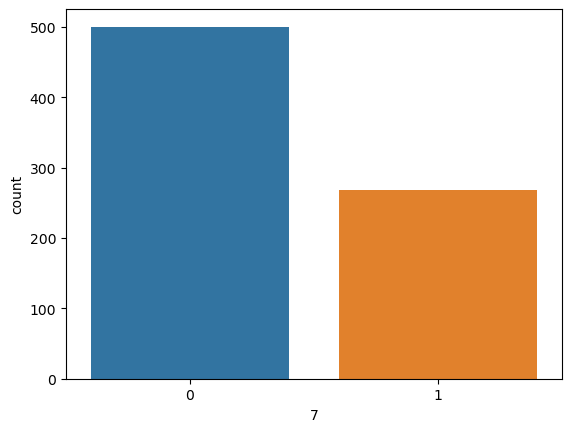

In [58]:
sns.countplot(x=y)

Here you can see graphically that 0's values are in majority.

# Applying SMOTE():-

To apply SMOTE we have to install a library named imblearn and remember after installing imblearn make that code markdown so that it could not execute again.

pip install imblearn

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
smt=SMOTE()

newx,newy=smt.fit_resample(x,y)

In [65]:
newx.value_counts()

0    1   2   3    4          5         6 
0    48  20  0    24.700000  0.140000  22    1
138  74  26  144  36.100000  0.557000  50    1
136  90  0   0    29.900000  0.210000  50    1
137  40  35  168  43.100000  2.288000  33    1
     61  0   0    24.200000  0.151000  55    1
                                            ..
109  62  41  128  35.855350  0.512463  25    1
             129  35.800000  0.514000  25    1
     64  44  99   34.800000  0.905000  26    1
     67  26  0    27.279448  0.175186  37    1
199  76  43  0    42.900000  1.394000  22    1
Length: 1000, dtype: int64

In [64]:
newy.value_counts()

1    500
0    500
Name: 7, dtype: int64

Here you can see SMOTE give me new input variable named newx with 1000 rows and corospondindly its gives me newy that is output column where 0's and 1's values are exatcly same both are 500.So it creates 232 rows automatically to balance our dataset.

In [66]:
x_train,x_test,y_train,y_test=train_test_split(newx,newy,test_size=.30,random_state=45)

In [67]:
lm=LogisticRegression()

In [68]:
lm.fit(x_train,y_train)

LogisticRegression()

In [69]:
pred=lm.predict(x_test)
pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0], d

In [70]:
print(lm.score(x_train,y_train))

0.76


In [75]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(pred,y_test),2))

0.77


# Now I will load a datset named winequality-red.csv first I will check that this dataset is imbalanced or not,if its imbalanced then I will converts it to Balanced dataset and then I will perform decisionTreeClassifier in it and will fetch accuracy_score,confusion_matrics,classification_report from it.Lets see how can I do that: 

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [78]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/winequality-red.csv",na_values=".")
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


# Checking for imbalanceness:-

In [80]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

You can clearly see majority of data goes for 5 and 6 quality rateing so this dataset is clearly imbalanced.

In [87]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# See imbalanceness graphically:

<Axes: xlabel='quality', ylabel='count'>

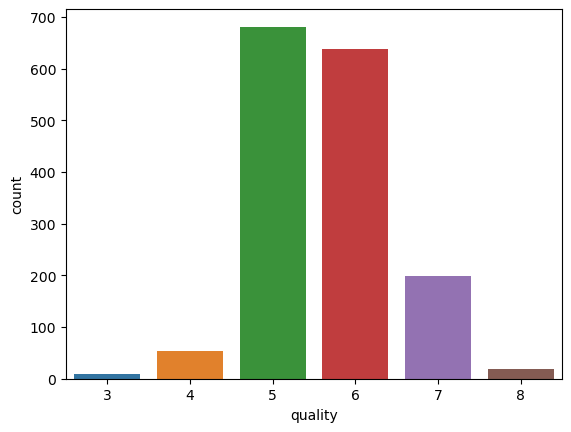

In [85]:
sns.countplot(x=df["quality"])

pip install imblearn

In [86]:
from imblearn.over_sampling import SMOTE

In [89]:
smt=SMOTE()
new_x,new_y=smt.fit_resample(x,y)

In [90]:
new_y.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

Now you can see all quality have the same values.

<Axes: xlabel='quality', ylabel='count'>

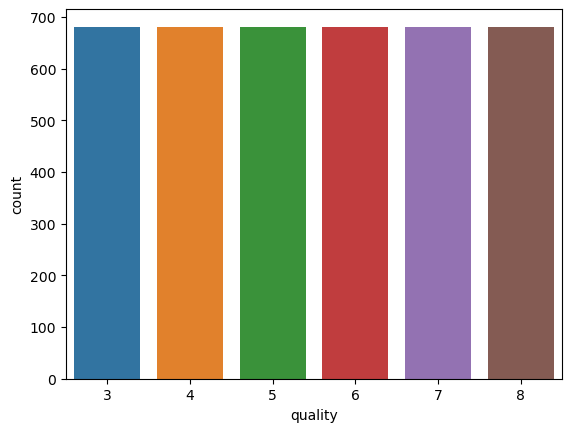

In [91]:
sns.countplot(x=new_y)

In [92]:
x_train,x_test,y_train,y_test=train_test_split(new_x,new_y,test_size=.30,random_state=45)

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

dtc=DecisionTreeClassifier()

dtc.fit(x_train,y_train)
print("Score is:",dtc.score(x_train,y_train))

preddtc=dtc.predict(x_test)

print("Accuracy score is:",round(accuracy_score(preddtc,y_test),2))

print(confusion_matrix(preddtc,y_test))

print(classification_report(preddtc,y_test))

Score is: 1.0
Accuracy score is: 0.77
[[214   4   6   2   0   0]
 [  4 160  22   9   4   0]
 [  2  11 113  44   7   0]
 [  0  19  50 105  20   1]
 [  0   2   8  37 162  10]
 [  0   0   0  10   7 193]]
              precision    recall  f1-score   support

           3       0.97      0.95      0.96       226
           4       0.82      0.80      0.81       199
           5       0.57      0.64      0.60       177
           6       0.51      0.54      0.52       195
           7       0.81      0.74      0.77       219
           8       0.95      0.92      0.93       210

    accuracy                           0.77      1226
   macro avg       0.77      0.76      0.77      1226
weighted avg       0.78      0.77      0.78      1226



# Curse of dimensionality reduction:-

When your model has too much column like 60,70,200 so model did not learn well so in this situation we have to use a technique named  PCA()- Principle Component Analysis. It will reduce your dataset column to your desired number by merging highly correlated column. 

Eg-
Suppose your dataset has 100 of columns so you can write like :

    PCA[n_components=15] 

    So your 100 columns reduced to 15.


# Now I will load a dataset named soner where too much columns is present then I will redused those columns to 10.Lets see how can I do that:

In [99]:
ds=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/sonar.csv",na_values=".",header=None)
ds

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


Here you can see our dataset has 61 columns and I want to reduce those columns to 10 without dropping any column.Lets see how can I do this:

In [107]:
x=ds.iloc[:,:-1]
y=ds.iloc[:,-1]

In [108]:
x.shape

(208, 60)

# Calling PCA to reduce columns to 10:

In [111]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
#pca=PCA(25)

x=pca.fit_transform(x)

In [114]:
x.shape

(208, 10)

Here you can see you x input columns reduced to 60 to 10.

In [113]:
y.head(2)

0    R
1    R
Name: 60, dtype: object

Our y column data has string values.Lets apply LabelEncoder to it.

# Applying LableEncoder to our y:

In [115]:
from sklearn.preprocessing import LabelEncoder

ln=LabelEncoder()
y=ln.fit_transform(y)

In [116]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

You can see our y value is changed to numbers.